## 1. Insights

The climatic variations as a function of geograpy are being investigated through 2-d scatter and climatic geomap plots. This involves analyzing the association beween four basic climatic factors including temperature, humidity, cloudiness and wind speed with respect to latitude and latitude-longitude.

### 1.1. Climate and Latitude
### 1.1.1. Temperature (F) vs. Latitude
Investigating temperature at different latitudes shows:
- There exists a negative association between temperature and distance from equator. Temperature smoothly falls off with latitude towards the two poles. The regions close to the equator experience higher temperatures compared to those close to the North and South poles.

### 1.1.2. Humidity (F) vs. Latitude
Investigating humidity at different latitudes shows:
- There exists a weak negative association between the temperature and the distance from equator. As one moves away from the equator, the humidity decreases .

### 1.1.3. Cloudiness (F) vs. Latitude
Investigating the cloudiness at different latitude shows:
Ther is no clear association with latitude.

### 1.1.4. Wind Speed vs (Total Drivers vs Total Rides)
Investigating the wind speed at different latitudes shows:
- There exist a weak positive association between wind speed and distance from equator.

### 1.2. Climate and Latitude-Longitude
TBA

## 2. Limitations

- The current analysis has heavily focused on temperature records sampled at cities across the world that can easily influenced by the non-unfiormity of city distributions. As the land masses are distributed predominantly in the Northern Hemisphere (68%) compared to the Southern Hemisphere (32%), it is quite likely that more cities are located in Northern hemisphere compared to the Sothern Hemisphere.
- The climatic variation has only been assessed with respect to latitude while ingnorng other plusible governing factors. It is well know that any climatic phenomenon depends on other factors such as altitude and local topgrapy and clearly, an accurate climatic analysis can be achieved as any potential factor being accounted for global level climatic variations is considered.   

## 3. Implementation

### 3.1. Import Dependecies

In [1]:
# import dependecies
%matplotlib inline
import os, sys, inspect
import time
import random
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap as bm
from itertools import product
from citipy import citipy as cp
from pprint import pprint

# add parent dir to system dir
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
root_dir = os.path.dirname(current_dir)
sys.path.insert(0, root_dir) 

### 3.2. Import API keys

In [2]:
# OpenWeatherMap api key
from config import api_key

### 3.3. Set global varriables

In [3]:
DEGREE = u"\u00b0"

### 3.4. Define functions

In [4]:
def scatter(
    x, y,
    marker="o",
    markersize=6,
    markeredgecolor="black",
    markeredgewidth=1,
    markerfacecolor="black",
    fillstyle="full",
    linestyle="",
    alpha=.7,
    xlabel="",
    ylabel="",
    label="",
    title="",
    xlim=None,
    ylim=None,
    fontsize_title=14,
    fontsize_label=13,
    fontsize_xtick=12,
    fontsize_ytick=12,
    figsize=(7, 5),
    legend=True,
    grid=True,
    ax=None,):
    """Scatter plot given input 'x' and 'y'. Wrapper function to interface 'matplotlib.pyplot.plot'
    to perform scatter plot.
    """
    
    # create figure/axis handler
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.subplots(1,1)
    
    # scatter plot
    ax.plot(
        x, y,
        marker=marker,
        markersize=markersize,
        markeredgecolor=markeredgecolor,
        markeredgewidth=markeredgewidth,
        markerfacecolor=markerfacecolor,
        fillstyle=fillstyle,
        linestyle=linestyle,
        alpha=alpha,
        label=label,
    )
    # set title
    _ = ax.set_title(
        title,
        fontsize=fontsize_title,
        fontweight="bold"
    )
    # set axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.label.set_size(fontsize_label)
    ax.yaxis.label.set_size(fontsize_label)
    
    # set axis ticks
    [tick.label.set_fontsize(fontsize_xtick) for tick in ax.xaxis.get_major_ticks()]
    [tick.label.set_fontsize(fontsize_ytick) for tick in ax.yaxis.get_major_ticks()]
    
    # set axis range limits            
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # set legend
    if legend and (label is not ""):
        ax.legend()
    
    # set grid
    if grid:
        ax.grid(
            True,
            color="grey",
            linestyle=":",
            linewidth=1.5,
            alpha=0.5
        )
    
    # set tight layout
    plt.tight_layout()
    return ax


def scatter_weather_vs_latitude():
    """Scatter plot weather trend vs. latitude. Wrapper fucntion to interface 'scatter' to perform
    weather data scatter plot, handeling different colors for north- and south-hemisphere.
    """
    # set figure size
    fig = plt.figure(figsize=(figsize))
    ax = fig.subplots(1, 1)
    
    # get x-axes and y-axes data 
    x = df["Latitude"].values
    y = df[metric].values
    
    # set axes params 
    xlabel = "Latitude"
    ylabel = f"{metric} ({unit})"
    time_str = time.strftime("'%Y-%m-%d %H:%M'", current_time)
    title = f"{metric} variations ({unit}) vs Latitude for {time_str}"
    
    # scatter plot for north-hemisphere
    ax = scatter(
        x=x[x>=0],
        y=y[x>=0],
        markerfacecolor="red",
        markeredgecolor="red",
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        xlim=[-90, 90],
        ylim=ylim,
        label="Northern Hemisphere",
        ax=ax,
    )
    
    # scatter plot for south-hemisphere
    ax = scatter(
        x=x[x<0],
        y=y[x<0],
        markerfacecolor="navy",
        markeredgecolor="navy",
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        xlim=[-90, 90],
        ylim=ylim,
        label="Southern Hemisphere",
        ax=ax,
    )
    return ax, fig


def geomap_scatter(lats, lons, vals=None, vlim=None, markersize=4,
    fontsize_title=12, fontsize_label=11, fontsize_xtick=9, fontsize_ytick=9,
    alpha=0.95, title="", label="", figsize=(10, 7),
    colormap="bwr"):
    """Geomap plot weather trends. Wrapper fucntion to interface 'mpl_toolkits.basemap'to perform
    geo-map for weather data.
    """
    
    
    # create figure/axis handler
    fig = plt.figure(figsize=figsize)
    ax = fig.subplots(1, 1)
    
    # create a base map object
    bmap = bm(
        projection='merc',
        llcrnrlat=-80,
        urcrnrlat=80,
        llcrnrlon=-180,
        urcrnrlon=180,
        lat_ts=50,
        resolution="l")
    
    # draw coast lines
    bmap.drawcoastlines()
    
    # draw countries
#     bmap.drawcountries()
    
    # draw/set up parllel lines
    parallels = np.arange(-90.,91.,30.)
    bmap.drawparallels(parallels)
    bmap.drawparallels(
        parallels,
        labels=[True,False,False,False],
        fontsize=fontsize_ytick)
    
    # draw/set up meridians
    meridians = np.arange(-180.,181.,30.)
    bmap.drawmeridians(meridians)
    bmap.drawmeridians(
        meridians,
        labels=[True,False,False,True],
        fontsize=fontsize_xtick,)
    
    # draw/set up map boundaries
    bmap.drawmapboundary(fill_color='white')
    
    # draw/set up continents
    bmap.fillcontinents(color="#cc9955", lake_color="steelblue", alpha=0.2)
    
    # set title
    _ = ax.set_title(
        title,
        fontsize=fontsize_title,
        fontweight="bold"
    )
    
    # set axis ticks
    [tick.label.set_fontsize(fontsize_xtick) for tick in ax.xaxis.get_major_ticks()]
    [tick.label.set_fontsize(fontsize_ytick) for tick in ax.yaxis.get_major_ticks()]
    plt.tight_layout()    

    # tranform input lats and lons to map projections
    x, y = bmap(lons, lats)
    
    if vals is None:
        # perform 2-D scatter plot
        ax.plot(
            x, y,
            marker="o",
            linestyle="",
            linewidth=2,
            markerfacecolor="royalblue",
            markeredgecolor="mediumblue",
            markersize=markersize,
            alpha=alpha)
    else:
        # perom bubble plot
        if vlim is None:
            vlim = [min(vals), max(vals)]
        # set a colormap
        cmap = plt.cm.get_cmap(colormap)
        cax = plt.scatter(
            x=x, y=y, c=vals,
            vmin=vlim[0],
            vmax =vlim[1],
            cmap=cmap,
            s=50,
            edgecolors='none',
            alpha=.95,
            )
        # set color bar
        cbar = plt.colorbar(cax, shrink =1, pad=0.01)
        cbar.set_label(label)
        date = datetime.utcnow()
        CS = bmap.nightshade(date, alpha=0.2)
    
    # set tight layout
    plt.tight_layout()
    
    return ax, fig


### 3.5. Define setup parameters

In [5]:
# set number of samples
nm_samples = 1000
# set (latitude, longitude) intervals
nm_lats = 100
nm_lons = 100
# set path to save figures
path_fig = os.path.join(root_dir, "reports", "figures")
path_log = os.path.join(root_dir, "reports", "logs")
# set true to save figures
save_fig = True
# set true to save results to csv
save_csv = True
# set true to log print
verbose = False
# set figure size
figsize = (10, 7)
markersize = 6
# set api params
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
params = {
    "appid": api_key,
    "units": units
}

In [6]:
# generate latitudes and longitudes
lats = np.linspace(-90, 90, nm_lats)
lons = np.linspace(-180, 180, nm_lons)

In [7]:
df = pd.DataFrame()
df["City Name"] = [""]
df["Country Code"] = [""]

index = 0
for lat, lon in product(lats, lons):
    city = cp.nearest_city(lat, lon)
    city_name = city.city_name.title()
    country_code = city.country_code
    
    if not df["City Name"].isin([city_name]).any():
        if verbose:
            print("{:4d} ({:+07.2f}{:s},{:+07.2f}{:s}) {:20s} {:s}".format(
                index, lat, DEGREE, lon, DEGREE, city_name, country_code))
        df.loc[index, "City Name"] = city_name
        df.loc[index, "Country Code"] = country_code
        index += 1

In [8]:
df.head(20)

,City Name,Country Code
0,Vaini,to
1,Mataura,pf
2,Rikitea,pf
3,Punta Arenas,cl
4,Ushuaia,ar
5,Hermanus,za
6,Bredasdorp,za
7,Port Elizabeth,za
8,Port Alfred,za
9,East London,za


### 3.6. Collect evaluation city weather data

In [9]:
# get 'n' random samples from collected cities 
df = df.loc[
    np.random.choice(list(range(0, df.shape[0])),
                     size=nm_samples,
                     replace=False), :]
df["Latitude"] = ""
df["Longitude"] = ""
df["Temperature"] = ""
df["Humidity"] = ""
df["Cloudiness"] = ""
df["Wind-Speed"] = ""
df["Wind-Direction"] = ""

# get current time
current_time = time.gmtime()

# collect weather data from API
for index, row in df.iterrows():
    city_name = row["City Name"]
    country_code = row["Country Code"]
    params["q"] = f"{city_name},{country_code}"
    response_ = requests.get(url, params)
    response = response_.json()
    try:
        df.loc[index]["Latitude"] = response["coord"]["lat"]
        df.loc[index]["Longitude"] = response["coord"]["lon"]
        df.loc[index]["Temperature"]  = response["main"]["temp"]
        df.loc[index]["Humidity"] = response["main"]["humidity"]
        df.loc[index]["Cloudiness"] = response["clouds"]["all"] 
        df.loc[index]["Wind-Speed"] = response["wind"]["speed"]
        df.loc[index]["Wind-Direction"] = response["wind"]["deg"]
        if verbose:
            print(f"{index} {city_name} <{response_.url}>: OK")
    except (KeyError, IndexError):
        if verbose:
            print(f"{index} {city_name} <{response_.url}>: ERROR, skipped")
        df.drop(labels=index, inplace=True)
df = df.reset_index()

In [10]:
df.head(20)

,index,City Name,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind-Speed,Wind-Direction
0,1009,Diffa,ne,13.32,12.61,91.51,45,0,8.41,186.503
1,496,Bima,id,-8.45,118.73,74.68,100,20,4.83,166.503
2,993,Wiwili,ni,13.63,-85.83,77,69,75,2.71,176.003
3,1975,Ust-Koksa,ru,50.27,85.62,34.54,93,0,1.92,170.003
4,492,Victoria,sc,-4.62,55.45,81.25,100,68,11.21,115.503
5,227,Thabazimbi,za,-24.59,27.41,55.15,49,32,2.37,304.503
6,1839,Challans,fr,46.85,-1.88,66.78,73,0,5.82,210
7,2223,Khvoynaya,ru,58.9,34.53,62.71,56,68,6.62,246.503
8,686,Samarinda,id,-0.5,117.14,73.24,100,24,2.15,266.503
9,2139,Yashkino,ru,55.87,85.43,41.92,100,92,12.21,30.003


### 3.7. Plot city distribution map

/home/h8147/miniconda3/envs/as/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/h8147/miniconda3/envs/as/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


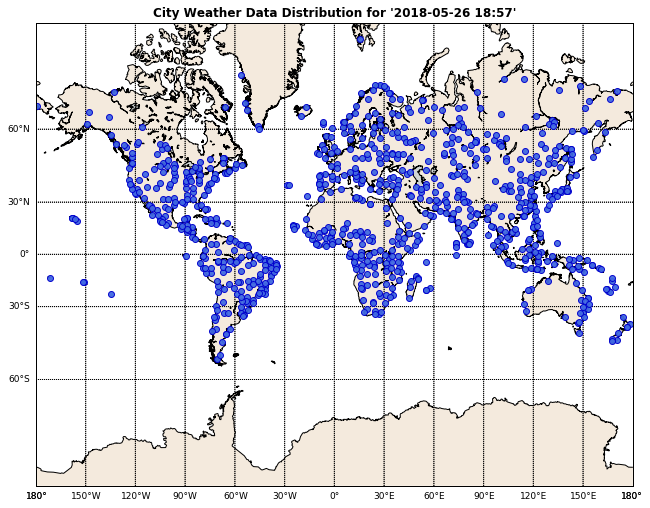

In [11]:
time_str = time.strftime("'%Y-%m-%d %H:%M'", current_time)
title = f"City Weather Data Distribution for {time_str}"

ax, fig = geomap_scatter(
    df["Latitude"].values,
    df["Longitude"].values,
    vals=None,
    vlim=None,
    markersize=markersize,
    title=title,
    figsize=figsize)
if save_fig:
    time_str = time.strftime("%Y-%m-%d-%H-%M", current_time)
    fig.savefig(os.path.join(path_fig, f"city-distribution-{time_str}"),
                transparent=False, bbox_inches="tight")

### 3.8. Scatter plots

### 3.8.1. Temperature vs. Latitude

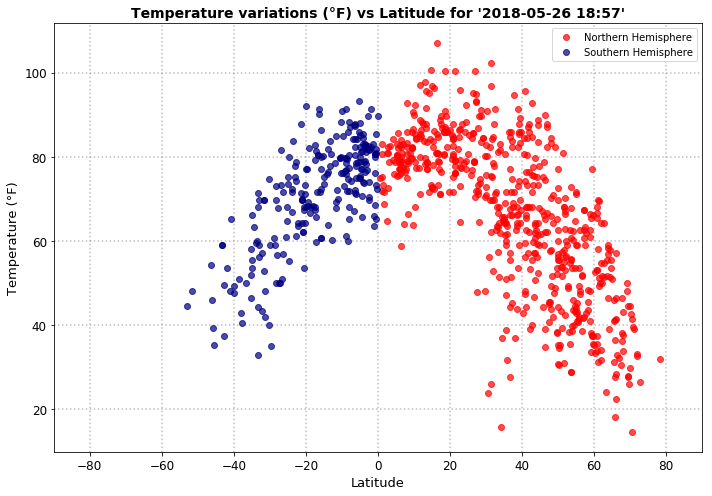

In [12]:
metric = "Temperature"
unit = f"{DEGREE}F"
ylim = None

ax , fig = scatter_weather_vs_latitude()
if save_fig:
    time_str = time.strftime("%Y-%m-%d-%H-%M", current_time)
    fig.savefig(os.path.join(path_fig, f"{metric}".lower() + f"-vs-latitude-{time_str}"),
                transparent=False, bbox_inches="tight")

### 3.8.2. Humidity vs. Latitude

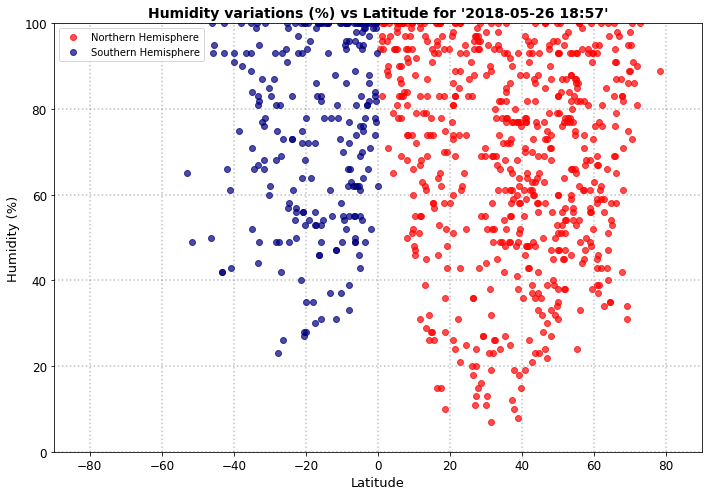

In [13]:
metric = "Humidity"
unit = "%"
ylim = [0, 100]

ax , fig = scatter_weather_vs_latitude()
if save_fig:
    time_str = time.strftime("%Y-%m-%d-%H-%M", current_time)
    fig.savefig(os.path.join(path_fig, f"{metric}".lower() + f"-vs-latitude-{time_str}"),
                transparent=False, bbox_inches="tight")

### 3.8.3. Cloudiness vs. Latitude

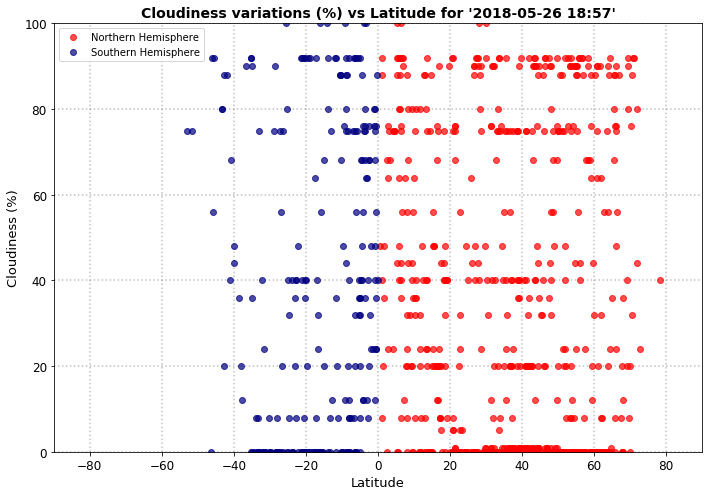

In [14]:
metric = "Cloudiness"
unit = "%"
ylim = [0, 100]


ax , fig = scatter_weather_vs_latitude()
if save_fig:
    time_str = time.strftime("%Y-%m-%d-%H-%M", current_time)
    fig.savefig(os.path.join(path_fig, f"{metric}".lower() + f"-vs-latitude-{time_str}"),
                transparent=False, bbox_inches="tight")

### 3.8.4. Wind-Speed vs. Latitude

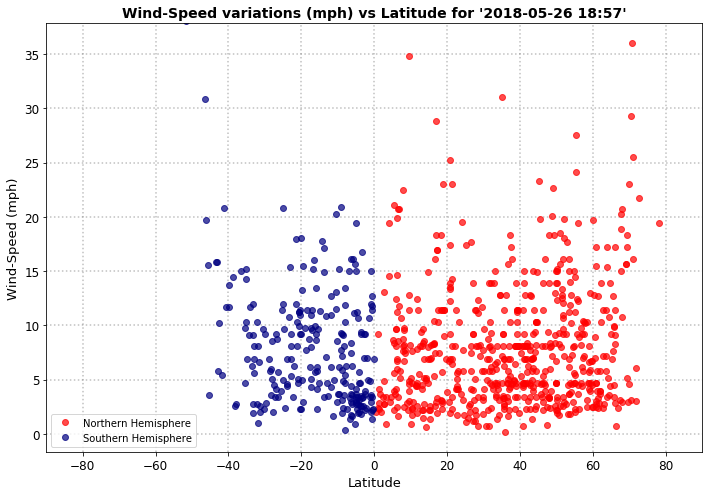

In [15]:
metric = "Wind-Speed"
unit = "mph"
ylim = None

ax, fig = scatter_weather_vs_latitude()
if save_fig:
    time_str = time.strftime("%Y-%m-%d-%H-%M", current_time)
    fig.savefig(os.path.join(path_fig, f"{metric}".lower() + f"-vs-latitude-{time_str}"),
                transparent=False, bbox_inches="tight")

### 3.9. Geomaps

### 3.9.1. Temperature

/home/h8147/miniconda3/envs/as/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/h8147/miniconda3/envs/as/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


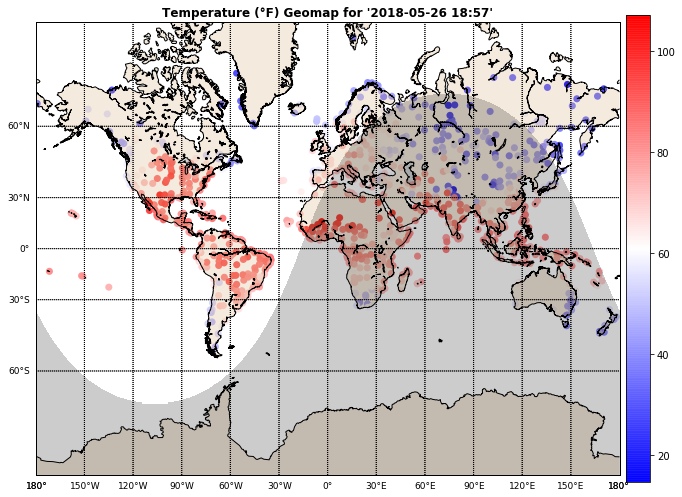

In [16]:
metric = "Temperature"
unit = f"{DEGREE}F"
colormap = "bwr"
vlim = None

time_str = time.strftime("'%Y-%m-%d %H:%M'", current_time)
title = f"{metric} ({unit}) Geomap for {time_str}"
ax , fig = geomap_scatter(df["Latitude"].values,
               df["Longitude"].values,
               df[metric].values,
               vlim=vlim,
               markersize=markersize,
               title=title,
               figsize=figsize,
               colormap=colormap)
if save_fig:
    time_str = time.strftime("%Y-%m-%d-%H-%M", current_time)
    fig.savefig(os.path.join(path_fig, f"{metric}".lower() + f"-geomap-{time_str}"),
                transparent=False, bbox_inches="tight")

### 3.9.2. Humidity

/home/h8147/miniconda3/envs/as/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/h8147/miniconda3/envs/as/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


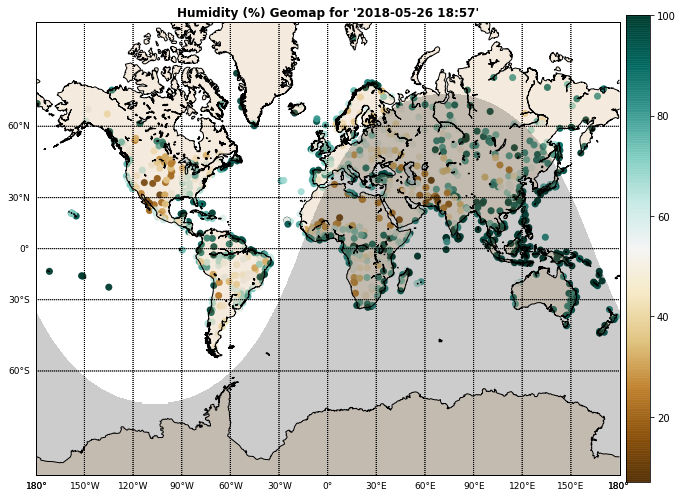

In [17]:
metric = "Humidity"
unit = "%"
colormap = "BrBG"
vlim = None

time_str = time.strftime("'%Y-%m-%d %H:%M'", current_time)
title = f"{metric} ({unit}) Geomap for {time_str}"
ax , fig = geomap_scatter(df["Latitude"].values,
               df["Longitude"].values,
               df[metric].values,
               vlim=vlim,
               markersize=markersize,
               title=title,
               figsize=figsize,
               colormap=colormap)
if save_fig:
    time_str = time.strftime("%Y-%m-%d-%H-%M", current_time)
    fig.savefig(os.path.join(path_fig, f"{metric}".lower() + f"-geomap-{time_str}"),
                transparent=False, bbox_inches="tight")

### 3.9.3. Cloudiness

/home/h8147/miniconda3/envs/as/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/h8147/miniconda3/envs/as/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


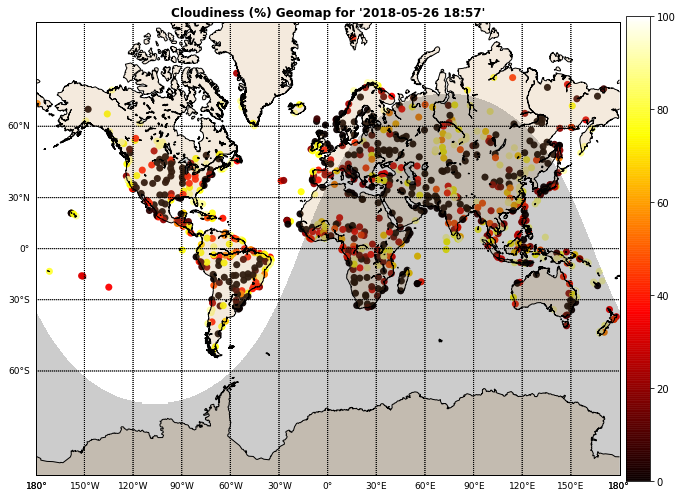

In [18]:
metric = "Cloudiness"
unit = "%"
colormap = "hot"
vlim = None

time_str = time.strftime("'%Y-%m-%d %H:%M'", current_time)
title = f"{metric} ({unit}) Geomap for {time_str}"
ax , fig = geomap_scatter(df["Latitude"].values,
               df["Longitude"].values,
               df[metric].values,
               vlim=vlim,
               markersize=markersize,
               title=title,
               figsize=figsize,
               colormap=colormap)
if save_fig:
    time_str = time.strftime("%Y-%m-%d-%H-%M", current_time)
    fig.savefig(os.path.join(path_fig, f"{metric}".lower() + f"-geomap-{time_str}"),
                transparent=False, bbox_inches="tight")

### 3.9.4. Wind-Speed

/home/h8147/miniconda3/envs/as/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/h8147/miniconda3/envs/as/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


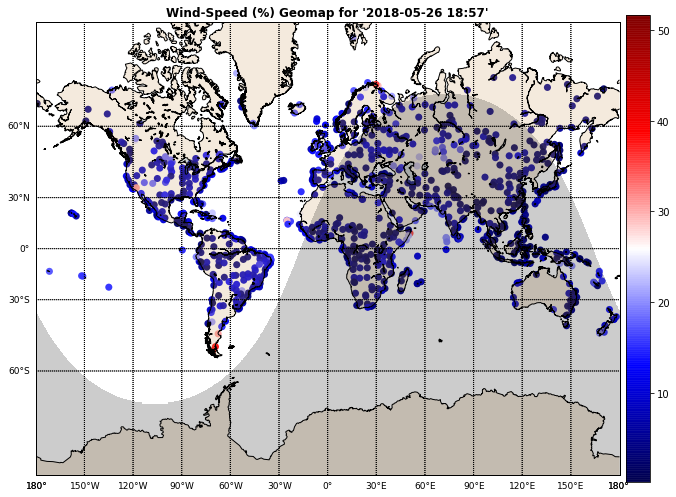

In [19]:
metric = "Wind-Speed"
unit = "%"
colormap = "seismic"
vlim = None

time_str = time.strftime("'%Y-%m-%d %H:%M'", current_time)
title = f"{metric} ({unit}) Geomap for {time_str}"
ax , fig = geomap_scatter(df["Latitude"].values,
               df["Longitude"].values,
               df[metric].values,
               vlim=vlim,
               markersize=markersize,
               title=title,
               figsize=figsize,
               colormap=colormap)
if save_fig:
    time_str = time.strftime("%Y-%m-%d-%H-%M", current_time)
    fig.savefig(os.path.join(path_fig, f"{metric}".lower() + f"-geomap-{time_str}"),
                transparent=False, bbox_inches="tight")

### 3.10. Save city eval data

In [20]:
if save_csv:
    time_str = time.strftime("%Y-%m-%d-%H-%M", current_time)
    df.to_csv(os.path.join(path_log, f"city-weather-{time_str}.csv"))